In [11]:
# Install required packages
!pip install pandas matplotlib seaborn numpy statsmodels

# Optional: suppress warnings
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 7.3 MB/s eta 0:00:00a 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/9.9 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/22.4 MB ? eta -:--:--Downloading scipy-1.15.3-cp313-cp313-macosx_14_0_arm64.whl (22.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 8.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [statsmodels] [statsmodels]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [statsmodels]


# TLS Handshake Performance Analysis

This notebook visualizes the performance data of TLS handshakes using X25519MLKEM768 hybrid key exchange.

In [12]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

# Set styles for better visualization
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [13]:
# Load the CSV file
df = pd.read_csv('timings.csv')

# Display the first few rows
df.head()

,request_number,duration_microseconds
0,1,7152.833
1,2,9978.708
2,3,14485.708
3,4,11765.792
4,5,11617.666


In [14]:
# Calculate basic statistics
stats = df['duration_microseconds'].describe()
print(f"Average handshake time: {stats['mean']:.2f} μs")
print(f"Minimum handshake time: {stats['min']:.2f} μs")
print(f"Maximum handshake time: {stats['max']:.2f} μs")
print(f"Standard deviation: {stats['std']:.2f} μs")

Average handshake time: 9567.15 μs
Minimum handshake time: 7152.83 μs
Maximum handshake time: 14485.71 μs
Standard deviation: 1318.35 μs


In [15]:
# Calculate additional percentiles (95%, 98%, 99%)
percentiles = df['duration_microseconds'].quantile([0.95, 0.98, 0.99])
print(f"95th Percentile: {percentiles[0.95]:.2f} μs")
print(f"98th Percentile: {percentiles[0.98]:.2f} μs")
print(f"99th Percentile: {percentiles[0.99]:.2f} μs")

95th Percentile: 12022.53 μs
98th Percentile: 12421.13 μs
99th Percentile: 13453.42 μs


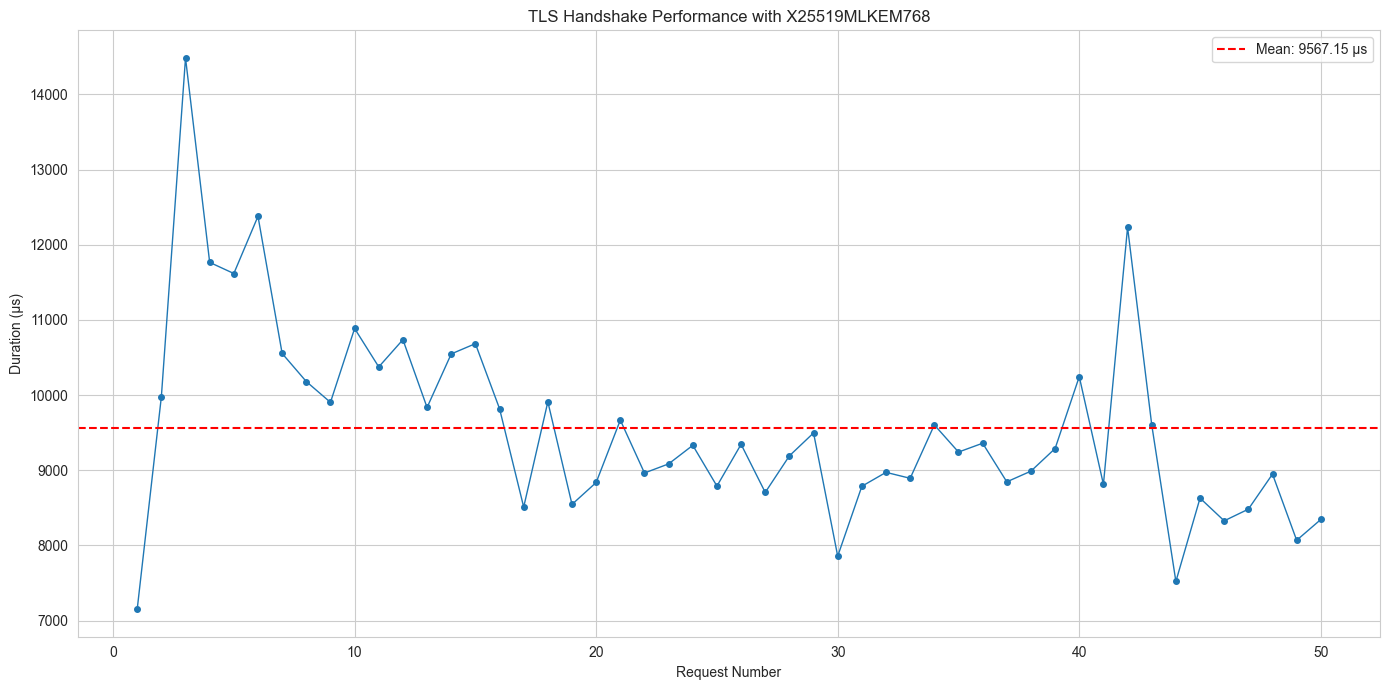

In [16]:
# Create a line plot of handshake times
plt.figure(figsize=(14, 7))
plt.plot(df['request_number'], df['duration_microseconds'], marker='o', linestyle='-', linewidth=1, markersize=4)
plt.axhline(y=stats['mean'], color='r', linestyle='--', label=f'Mean: {stats["mean"]:.2f} μs')

plt.title('TLS Handshake Performance with X25519MLKEM768')
plt.xlabel('Request Number')
plt.ylabel('Duration (μs)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('tls_handshake_performance.png', dpi=300)
plt.show()

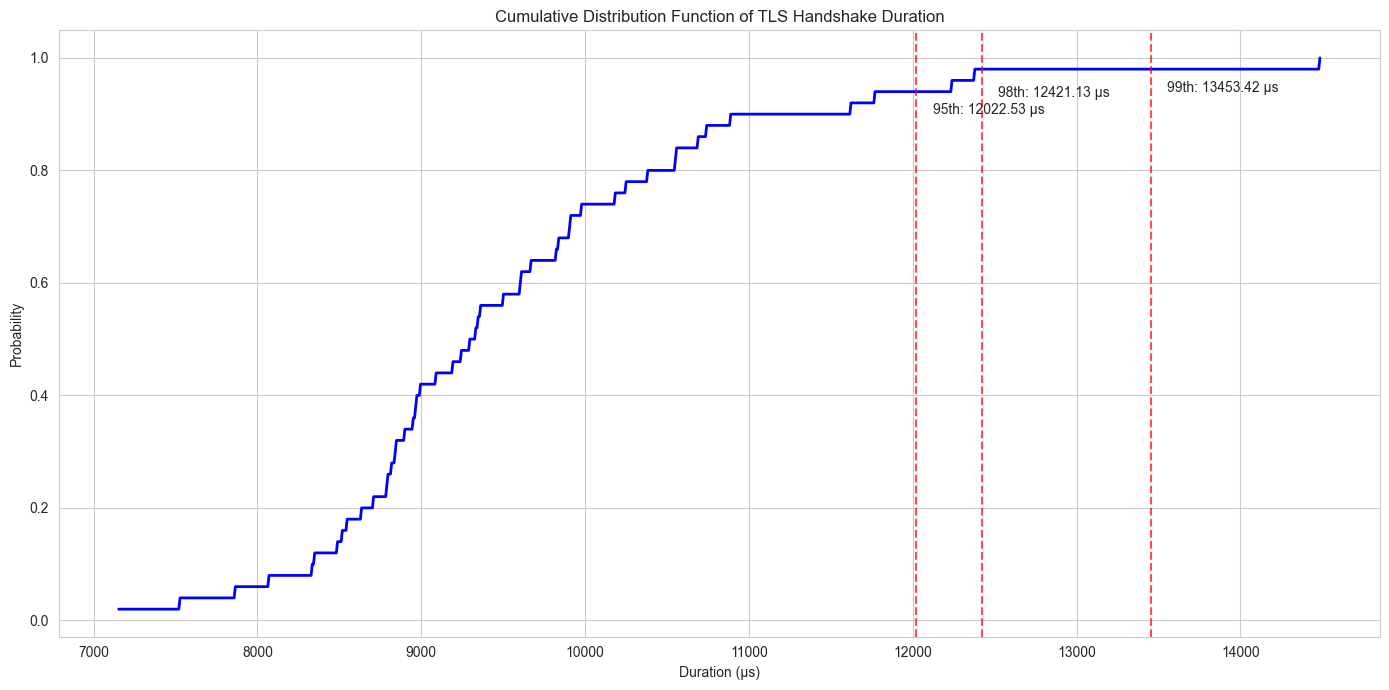

In [17]:
# Create a Cumulative Distribution Function (CDF) plot
# Compute the empirical CDF
ecdf = ECDF(df['duration_microseconds'])
x = np.linspace(min(df['duration_microseconds']), max(df['duration_microseconds']), 1000)
y = ecdf(x)

# Plot the CDF
plt.figure(figsize=(14, 7))
plt.plot(x, y, 'b-', linewidth=2)

# Add percentile lines
for p, label in zip([0.95, 0.98, 0.99], ['95th', '98th', '99th']):
    p_value = df['duration_microseconds'].quantile(p)
    plt.axvline(p_value, color='r', linestyle='--', alpha=0.7)
    plt.text(p_value + 100, p - 0.05, f'{label}: {p_value:.2f} μs', fontsize=10)

plt.title('Cumulative Distribution Function of TLS Handshake Duration')
plt.xlabel('Duration (μs)')
plt.ylabel('Probability')
plt.grid(True)
plt.tight_layout()
plt.savefig('tls_handshake_cdf.png', dpi=300)
plt.show()

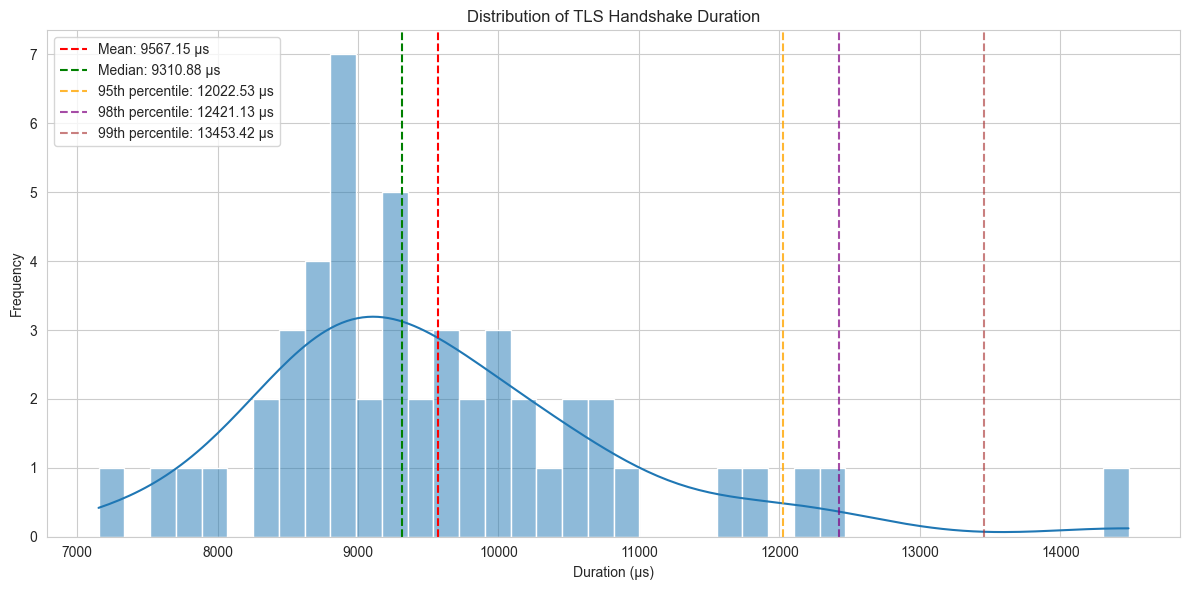

In [22]:
# Create a histogram to see the distribution of handshake times
plt.figure(figsize=(12, 6))
sns.histplot(df['duration_microseconds'], kde=True, bins=40)
plt.axvline(x=stats['mean'], color='r', linestyle='--', label=f'Mean: {stats["mean"]:.2f} μs')
plt.axvline(x=stats['50%'], color='g', linestyle='--', label=f'Median: {stats["50%"]:.2f} μs')

# Add percentile lines
for p, color, alpha in zip([0.95, 0.98, 0.99], ['orange', 'purple', 'brown'], [0.8, 0.7, 0.6]):
    p_value = df['duration_microseconds'].quantile(p)
    plt.axvline(x=p_value, color=color, linestyle='--', alpha=alpha, 
                label=f'{int(p*100)}th percentile: {p_value:.2f} μs')

plt.title('Distribution of TLS Handshake Duration')
plt.xlabel('Duration (μs)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.savefig('tls_handshake_distribution.png', dpi=300)
plt.show()